<a href="https://colab.research.google.com/github/quickgrid/CodeLab/blob/master/tensorflow/TFlite_Object_Detection_Custom_Model_Export_With_Metadata_TF1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Look into, https://github.com/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/r1/convert/python_api.md

# Setup Tensorflow and Models

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [3]:
!git clone https://github.com/tensorflow/models/

Cloning into 'models'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 45499 (delta 25), reused 48 (delta 4), pack-reused 45426
Receiving objects: 100% (45499/45499), 550.91 MiB | 27.89 MiB/s, done.
Resolving deltas: 100% (31130/31130), done.


In [4]:
%cd /content/models/research

/content/models/research


In [5]:
!python3 setup.py build && python3 setup.py install

running build
running build_py
creating build
creating build/lib
creating build/lib/object_detection
copying object_detection/export_inference_graph.py -> build/lib/object_detection
copying object_detection/export_tflite_ssd_graph_lib_tf1_test.py -> build/lib/object_detection
copying object_detection/exporter_lib_v2.py -> build/lib/object_detection
copying object_detection/export_tflite_ssd_graph.py -> build/lib/object_detection
copying object_detection/eval_util_test.py -> build/lib/object_detection
copying object_detection/export_tflite_graph_tf2.py -> build/lib/object_detection
copying object_detection/exporter_tf1_test.py -> build/lib/object_detection
copying object_detection/model_main_tf2.py -> build/lib/object_detection
copying object_detection/export_tflite_graph_lib_tf2.py -> build/lib/object_detection
copying object_detection/inputs.py -> build/lib/object_detection
copying object_detection/model_main.py -> build/lib/object_detection
copying object_detection/exporter_main_v2.p

In [7]:
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_oid_v4_2018_12_12.tar.gz

--2020-10-06 16:16:51--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_oid_v4_2018_12_12.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.218.128, 2a00:1450:4013:c08::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.218.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158851107 (151M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_oid_v4_2018_12_12.tar.gz’

ssd_mobilenet_v2_oi 100%[===================>] 151.49M  37.8MB/s    in 4.0s    

2020-10-06 16:16:56 (37.8 MB/s) - ‘ssd_mobilenet_v2_oid_v4_2018_12_12.tar.gz’ saved [158851107/158851107]



In [8]:
!pwd

/content/models/research


In [9]:
!mkdir custom_model

In [10]:
!mv ssd_mobilenet_v2_oid_v4_2018_12_12.tar.gz custom_model/ssd_mobilenet_v2_oid_v4_2018_12_12.tar.gz

In [11]:
!tar -xzvf custom_model/ssd_mobilenet_v2_oid_v4_2018_12_12.tar.gz

ssd_mobilenet_v2_oid_v4_2018_12_12/
ssd_mobilenet_v2_oid_v4_2018_12_12/model.ckpt.meta
ssd_mobilenet_v2_oid_v4_2018_12_12/checkpoint
ssd_mobilenet_v2_oid_v4_2018_12_12/frozen_inference_graph.pb
ssd_mobilenet_v2_oid_v4_2018_12_12/saved_model/
ssd_mobilenet_v2_oid_v4_2018_12_12/saved_model/variables/
ssd_mobilenet_v2_oid_v4_2018_12_12/saved_model/saved_model.pb
ssd_mobilenet_v2_oid_v4_2018_12_12/model.ckpt.index
ssd_mobilenet_v2_oid_v4_2018_12_12/pipeline.config
ssd_mobilenet_v2_oid_v4_2018_12_12/model.ckpt.data-00000-of-00001


In [12]:
!pwd

/content/models/research


In [13]:
# From tensorflow/models/
!protoc object_detection/protos/*.proto --python_out=.

In [14]:
!python setup.py build
!python setup.py install

running build
running build_py
copying object_detection/protos/model_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/losses_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/ssd_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/string_int_label_map_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/train_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/region_similarity_calculator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/image_resizer_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/target_assigner_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/square_box_coder_pb2.py -> build/lib/object_d

In [15]:
%cd /content/models/research

/content/models/research


In [16]:
%cd slim/
!python setup.py build
!python setup.py install

/content/models/research/slim
running build
running build_py
creating build
creating build/lib
creating build/lib/deployment
copying deployment/model_deploy.py -> build/lib/deployment
copying deployment/model_deploy_test.py -> build/lib/deployment
copying deployment/__init__.py -> build/lib/deployment
creating build/lib/nets
copying nets/cyclegan.py -> build/lib/nets
copying nets/overfeat.py -> build/lib/nets
copying nets/inception_v2.py -> build/lib/nets
copying nets/inception_v2_test.py -> build/lib/nets
copying nets/resnet_v2.py -> build/lib/nets
copying nets/lenet.py -> build/lib/nets
copying nets/alexnet.py -> build/lib/nets
copying nets/nets_factory_test.py -> build/lib/nets
copying nets/resnet_v1.py -> build/lib/nets
copying nets/post_training_quantization.py -> build/lib/nets
copying nets/mobilenet_v1_train.py -> build/lib/nets
copying nets/inception_v3_test.py -> build/lib/nets
copying nets/resnet_v2_test.py -> build/lib/nets
copying nets/inception_v1_test.py -> build/lib/nets

In [87]:
%cd /content/models/research

/content/models/research


In [18]:
!python object_detection/builders/model_builder_test.py

In [19]:
!python object_detection/export_tflite_ssd_graph.py \
  --pipeline_config_path object_detection/samples/configs/ssd_mobilenet_v2_oid_v4.config \
  --trained_checkpoint_prefix ssd_mobilenet_v2_oid_v4_2018_12_12/model.ckpt \
  --output_directory exported_model

Instructions for updating:
Please use `layer.__call__` method instead.
W1006 16:17:17.211817 139681155291008 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tf_slim-1.1.0-py3.6.egg/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I1006 16:17:19.430174 139681155291008 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1006 16:17:19.460886 139681155291008 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I1006 16:17:19.491302 139681155291008 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth

In [78]:
!mkdir /content/assets

mkdir: cannot create directory ‘/content/assets’: File exists


# Create Float tflite model

In [44]:
!tflite_convert \
  --input_shape=1,300,300,3 \
  --input_arrays=normalized_input_image_tensor \
  --output_arrays=TFLite_Detection_PostProcess,TFLite_Detection_PostProcess:1,TFLite_Detection_PostProcess:2,TFLite_Detection_PostProcess:3 \
  --allow_custom_ops \
  --graph_def_file=exported_model/tflite_graph.pb \
  --output_file=/content/assets/detect.tflite

2020-10-06 16:26:37.460897: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-10-06 16:26:37.496622: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-06 16:26:37.497212: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2020-10-06 16:26:37.497503: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-10-06 16:26:37.499351: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-10-06 16:26:37.501086: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2020-

# Create Quantized tflite model

In [88]:
!tflite_convert \
  --input_shape=1,300,300,3 \
  --input_arrays=normalized_input_image_tensor \
  --output_arrays=TFLite_Detection_PostProcess,TFLite_Detection_PostProcess:1,TFLite_Detection_PostProcess:2,TFLite_Detection_PostProcess:3 \
  --allow_custom_ops \
  --graph_def_file=exported_model/tflite_graph.pb \
  --output_file=/content/assets/detect.tflite \
  --post_training_quantize 1

2020-10-06 17:04:58.883817: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-10-06 17:04:58.916619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-06 17:04:58.917210: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2020-10-06 17:04:58.917525: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-10-06 17:04:58.919553: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-10-06 17:04:58.921224: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2020-

In [ ]:
!pwd

/content/models/research


# Test the converted model

In [24]:
!pwd

/content/models/research


In [89]:
%cd /content/assets/

/content/assets


In [30]:
!wget "https://www.australiangeographic.com.au/wp-content/uploads/2018/06/feeding-birds.jpg" -O "birds1.jpg"

--2020-10-06 16:20:31--  https://www.australiangeographic.com.au/wp-content/uploads/2018/06/feeding-birds.jpg
Resolving www.australiangeographic.com.au (www.australiangeographic.com.au)... 34.80.45.47
Connecting to www.australiangeographic.com.au (www.australiangeographic.com.au)|34.80.45.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 219142 (214K) [image/jpeg]
Saving to: ‘birds1.jpg’

birds1.jpg          100%[===================>] 214.01K   239KB/s    in 0.9s    

2020-10-06 16:20:34 (239 KB/s) - ‘birds1.jpg’ saved [219142/219142]



(443, 754, 3)


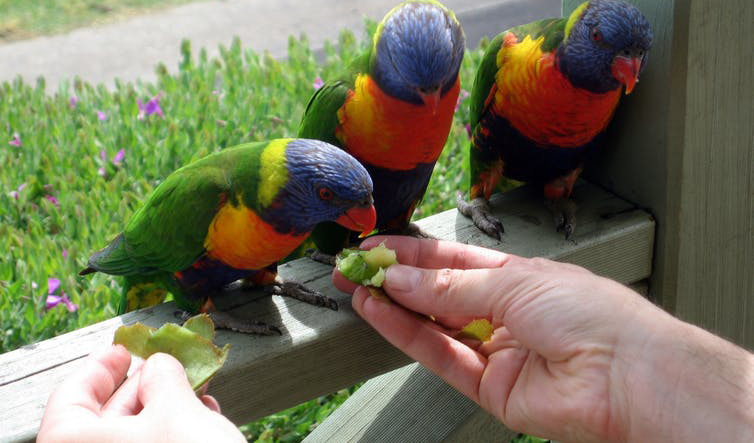

In [90]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


im1 = cv2.imread('birds1.jpg')
print(im1.shape)


cv2_imshow(im1)

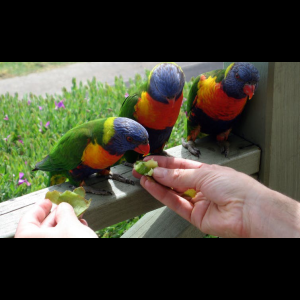

In [91]:
## Resize image to correct size, keep aspect ratio and fill rest
## Source, https://stackoverflow.com/questions/44720580/resize-image-canvas-to-maintain-square-aspect-ratio-in-python-opencv


def resizeAndPad(img, size, padColor=0):

    h, w = img.shape[:2]
    sh, sw = size

    # interpolation method
    if h > sh or w > sw: # shrinking image
        interp = cv2.INTER_AREA
    else: # stretching image
        interp = cv2.INTER_CUBIC

    # aspect ratio of image
    aspect = w/h  # if on Python 2, you might need to cast as a float: float(w)/h

    # compute scaling and pad sizing
    if aspect > 1: # horizontal image
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1: # vertical image
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else: # square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # set pad color
    if len(img.shape) is 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided
        padColor = [padColor]*3

    # scale and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=padColor)

    return scaled_img

v_img = im1 # vertical image
scaled_v_img = resizeAndPad(v_img, (300,300), 0)
cv2_imshow(scaled_v_img)

im1 = scaled_v_img

[{'name': 'normalized_input_image_tensor', 'index': 260, 'shape': array([  1, 300, 300,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]
[{'name': 'TFLite_Detection_PostProcess', 'index': 252, 'shape': array([ 1, 10,  4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}, {'name': 'TFLite_Detection_PostProcess:1', 'index': 253, 'shape': array([ 1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}, {'name': 'TFLite_Detection_PostProcess:2', 'index': 254, 'shape': array([ 1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}, {'name': 'TFLite_Detection_PostProcess:3', 'index': 255, 'shape': array([1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]
[  1 300 300   3]


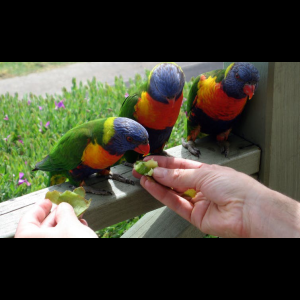

(1, 300, 300, 3)
[[[0.2978735  0.09192491 0.6624036  0.5535039 ]
  [0.20433334 0.57931817 0.5280451  0.872612  ]
  [0.5862337  0.28069493 0.641216   0.3822545 ]
  [0.46366352 0.42530793 0.79590183 0.98238   ]
  [0.22821313 0.6223322  0.46385193 0.8456447 ]
  [0.6114642  0.288154   0.65868205 0.3918255 ]
  [0.5636936  0.06229291 0.59181577 0.08492004]
  [0.5587922  0.35049894 0.6398501  0.45609888]
  [0.45719382 0.6792332  0.5275185  0.77384186]
  [0.62609386 0.24993503 0.6736523  0.31027013]]]
[[ 68. 531. 433.  68. 432. 433. 455. 433. 433. 433.]]
[[0.5087437  0.42783356 0.1576089  0.1563223  0.1558741  0.14444596
  0.12746209 0.12291038 0.12057376 0.12019771]]
[10.]


In [93]:
import tensorflow as tf


# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="detect.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(input_details)
print(output_details)

# Test the model on random input data.
input_shape = input_details[0]['shape']

print(input_shape)


#im2 = cv2.resize(im1, (300, 300))
im2 = im1

cv2_imshow(im2)

im2_arr = np.asarray(im2)


## preprocessing normalize and add single image batch
im2_arr = (2.0 / 255.0) * im2_arr - 1.0
im3_arr = np.expand_dims(im2_arr, axis=0)


print(im3_arr.shape)


## Select based on quantized or unquantized model
input_data = np.array(im3_arr, dtype=np.float32)
#input_data = np.array(im3_arr, dtype=np.uint8)



#input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)


interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

output_data = interpreter.get_tensor(output_details[1]['index'])
print(output_data)

output_data = interpreter.get_tensor(output_details[2]['index'])
print(output_data)

output_data = interpreter.get_tensor(output_details[3]['index'])
print(output_data)

In [94]:
def box_normal_to_pixel(box, dim,scalefactor=1):
    height, width = dim[0], dim[1]
    ymin = int(box[0]*height*scalefactor)
    xmin = int(box[1]*width*scalefactor)

    ymax = int(box[2]*height*scalefactor)
    xmax= int(box[3]*width*scalefactor)
    return np.array([xmin,ymin,xmax,ymax])  

[[[0.2978735  0.09192491 0.6624036  0.5535039 ]
  [0.20433334 0.57931817 0.5280451  0.872612  ]
  [0.5862337  0.28069493 0.641216   0.3822545 ]
  [0.46366352 0.42530793 0.79590183 0.98238   ]
  [0.22821313 0.6223322  0.46385193 0.8456447 ]
  [0.6114642  0.288154   0.65868205 0.3918255 ]
  [0.5636936  0.06229291 0.59181577 0.08492004]
  [0.5587922  0.35049894 0.6398501  0.45609888]
  [0.45719382 0.6792332  0.5275185  0.77384186]
  [0.62609386 0.24993503 0.6736523  0.31027013]]]
[ 68. 531. 433.  68. 432. 433. 455. 433. 433. 433.]
0.5087437
[ 27  89 166 198]
68.0


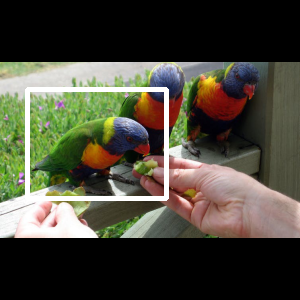

0.42783356
[173  61 261 158]
531.0


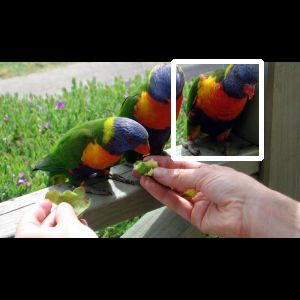

0.1576089
[ 84 175 114 192]
433.0


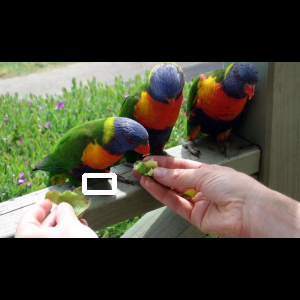

0.1563223
[127 139 294 238]
68.0


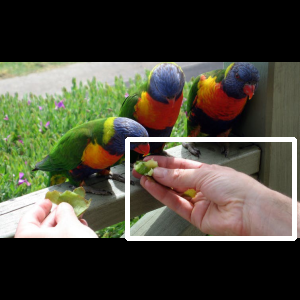

0.1558741
[186  68 253 139]
432.0


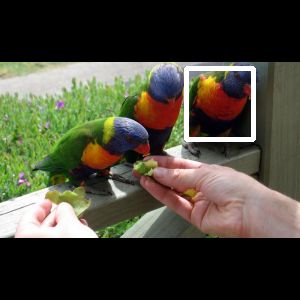

0.14444596
[ 86 183 117 197]
433.0


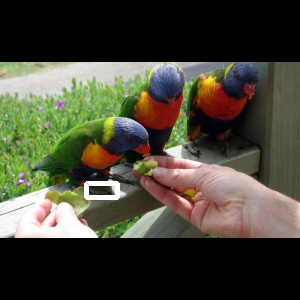

0.12746209
[ 18 169  25 177]
455.0


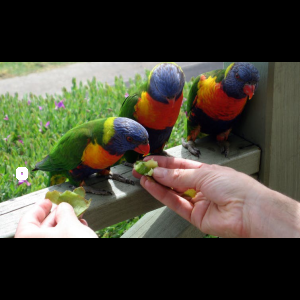

0.12291038
[105 167 136 191]
433.0


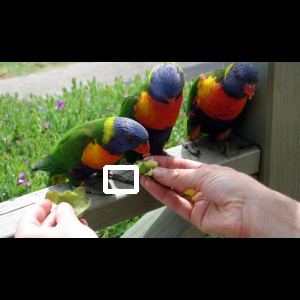

0.12057376
[203 137 232 158]
433.0


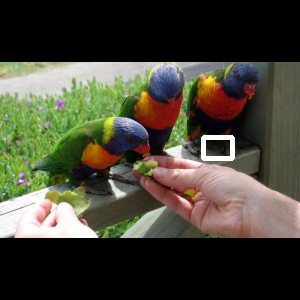

0.12019771
[ 74 187  93 202]
433.0


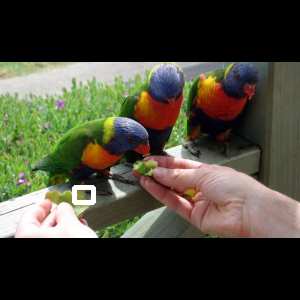

In [95]:
inp_copy = im1.copy()




output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)


output_data_squeeze = np.squeeze(output_data)


output_class_squeeze = np.squeeze(interpreter.get_tensor(output_details[1]['index']))
print(output_class_squeeze)


for i in range(0, 10):


  output_data_r = interpreter.get_tensor(output_details[2]['index'])
  output_data_s = np.squeeze(output_data_r)

  print(output_data_s[i])

  if True:
  #if(output_data_s[i] > 0.22):


    box1 = box_normal_to_pixel(output_data_squeeze[i], (300, 300))
    print(box1)


    #inp_copy = cv2.rectangle(inp_copy, (box1[0], box1[1]), (box1[2], box1[3]), (255,255,255), 3)
    inp_copy = cv2.rectangle(im1.copy(), (box1[0], box1[1]), (box1[2], box1[3]), (255,255,255), 3)
    

    #print(box1[0], box1[1], box1[2], box1[3])
    print(output_class_squeeze[i])

    inp_copy_img = np.squeeze(inp_copy)

    cv2_imshow(inp_copy_img)


In [ ]:
!wget http://storage.googleapis.com/download.tensorflow.org/models/tflite/coco_ssd_mobilenet_v1_1.0_quant_2018_06_29.zip

--2020-10-04 08:20:43--  http://storage.googleapis.com/download.tensorflow.org/models/tflite/coco_ssd_mobilenet_v1_1.0_quant_2018_06_29.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 66.102.1.128, 64.233.167.128, 64.233.166.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|66.102.1.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2807218 (2.7M) [application/zip]
Saving to: ‘coco_ssd_mobilenet_v1_1.0_quant_2018_06_29.zip’

coco_ssd_mobilenet_ 100%[===================>]   2.68M  --.-KB/s    in 0.008s  

2020-10-04 08:20:44 (351 MB/s) - ‘coco_ssd_mobilenet_v1_1.0_quant_2018_06_29.zip’ saved [2807218/2807218]



# Pack Metadata

In [55]:
!pip install tflite-support

     |████████████████████████████████| 1.0MB 9.5MB/s 
     |████████████████████████████████| 296kB 38.5MB/s 


In [96]:
from tflite_support import flatbuffers
from tflite_support import metadata as _metadata
from tflite_support import metadata_schema_py_generated as _metadata_fb

""" ... """
"""Creates the metadata for an image classifier."""

# Creates model info.
model_meta = _metadata_fb.ModelMetadataT()
model_meta.name = "MobileNetV2 SSD OID TF1 300x300 Object Detector"
model_meta.description = ("Localize the most prominent object in the "
                          "image from a set of N categories such as "
                          "trees, animals, food, vehicles, person etc.")
model_meta.version = "v1"
model_meta.author = "AA"
model_meta.license = ("Apache License. Version 2.0 "
                      "http://www.apache.org/licenses/LICENSE-2.0.")

In [97]:
# Creates input info.
input_meta = _metadata_fb.TensorMetadataT()

# Creates output info.
output_meta = _metadata_fb.TensorMetadataT()

In [98]:
input_meta.name = "image"
input_meta.description = (
    "Input image to be classified. The expected image is {0} x {1}, with "
    "three channels (red, blue, and green) per pixel. Each value in the "
    "tensor is a single byte between 0 and 255.".format(300, 300))
input_meta.content = _metadata_fb.ContentT()
input_meta.content.contentProperties = _metadata_fb.ImagePropertiesT()
input_meta.content.contentProperties.colorSpace = (
    _metadata_fb.ColorSpaceType.RGB)
input_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.ImageProperties)
input_normalization = _metadata_fb.ProcessUnitT()
input_normalization.optionsType = (
    _metadata_fb.ProcessUnitOptions.NormalizationOptions)
input_normalization.options = _metadata_fb.NormalizationOptionsT()
input_normalization.options.mean = [127.5]
input_normalization.options.std = [127.5]
input_meta.processUnits = [input_normalization]
input_stats = _metadata_fb.StatsT()
input_stats.max = [255]
input_stats.min = [0]
input_meta.stats = input_stats

In [99]:
labelmap_file = "/content/assets/labelmap.txt"


export_model_path = "/content/assets/detect.tflite"

In [100]:
import os

In [101]:
# Creates output info.
output_meta = _metadata_fb.TensorMetadataT()
output_meta.name = "probability"
output_meta.description = "Probabilities of the 1001 labels respectively."
output_meta.content = _metadata_fb.ContentT()
output_meta.content.content_properties = _metadata_fb.FeaturePropertiesT()
output_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_stats = _metadata_fb.StatsT()
output_stats.max = [1.0]
output_stats.min = [0.0]
output_meta.stats = output_stats
label_file = _metadata_fb.AssociatedFileT()
label_file.name = os.path.basename(labelmap_file)
label_file.description = "Labels for objects that the model can recognize."
label_file.type = _metadata_fb.AssociatedFileType.TENSOR_AXIS_LABELS
output_meta.associatedFiles = [label_file]

In [102]:
# Creates subgraph info.
subgraph = _metadata_fb.SubGraphMetadataT()
subgraph.inputTensorMetadata = [input_meta]
subgraph.outputTensorMetadata = [output_meta, output_meta, output_meta, output_meta]
model_meta.subgraphMetadata = [subgraph]

b = flatbuffers.Builder(0)
b.Finish(
    model_meta.Pack(b),
    _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
metadata_buf = b.Output()

In [103]:

populator = _metadata.MetadataPopulator.with_model_file(export_model_path)
populator.load_metadata_buffer(metadata_buf)
populator.load_associated_files([labelmap_file])
populator.populate()

In [104]:

displayer = _metadata.MetadataDisplayer.with_model_file(export_model_path)
export_json_file = os.path.join("/content/assets/", #"detect.json")
                    os.path.splitext(os.path.basename(export_model_path))[0] + ".json")
json_file = displayer.get_metadata_json()
# Optional: write out the metadata as a json file
with open(export_json_file, "w") as f:
  f.write(json_file)